<a href="https://colab.research.google.com/github/snagine/PythonDSA/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# from google.colab import files
# files.upload('')
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/GreatLearning/data/foodhub_order.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [7]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# Write your code here
print(df.isnull().sum())
# df.fillna(0)
# There are no null values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Write your code here
df.describe()

print(df['food_preparation_time'].min())
print(df['food_preparation_time'].mean())
print(df['food_preparation_time'].max())

20
27.371970495258168
35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here

df[df['rating']=='Not given'].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

<Axes: xlabel='restaurant_name', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)


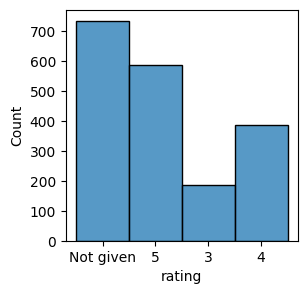

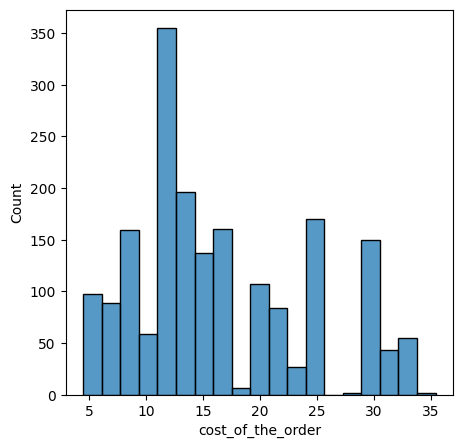

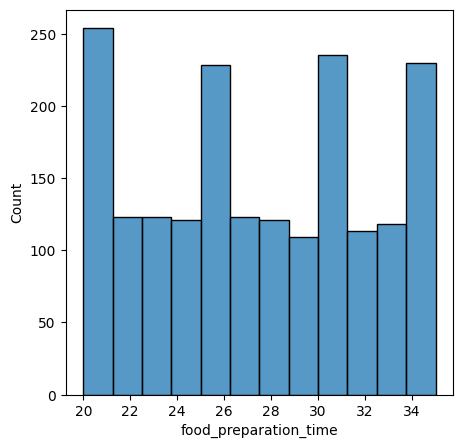

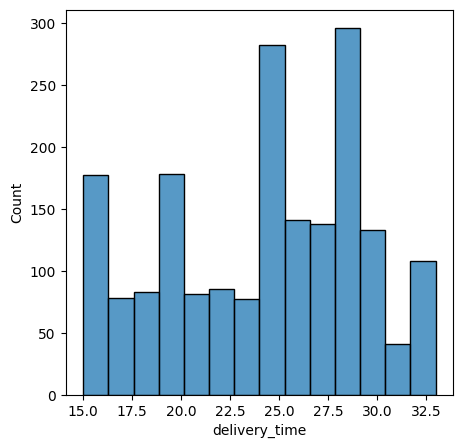

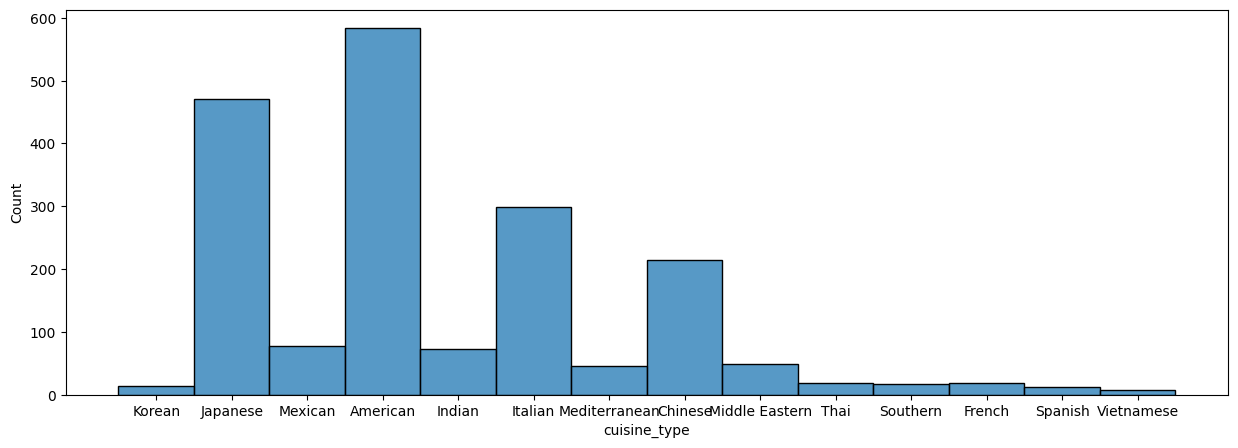

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


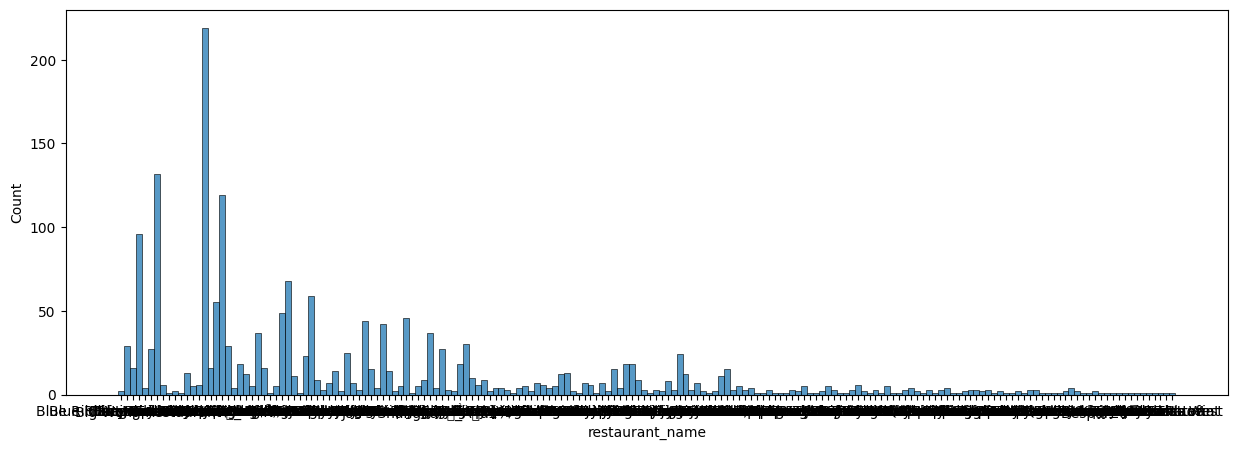

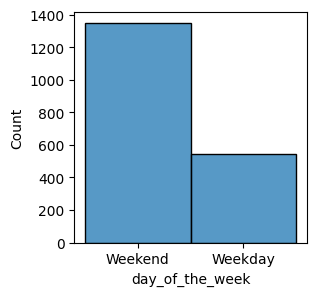

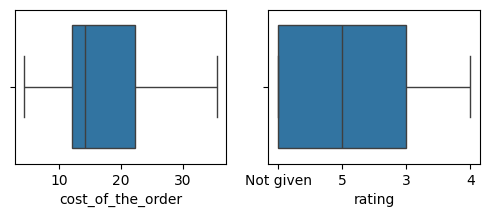

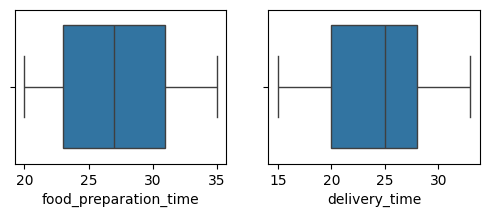

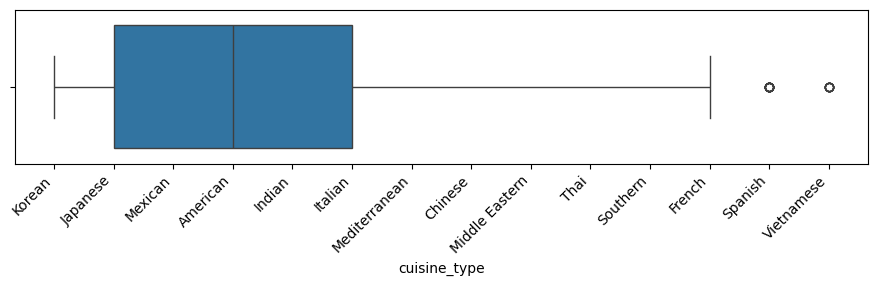

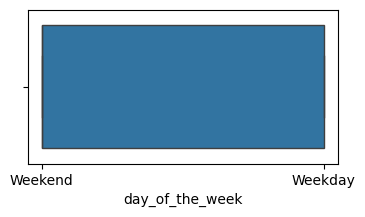

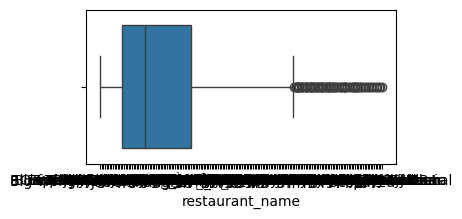

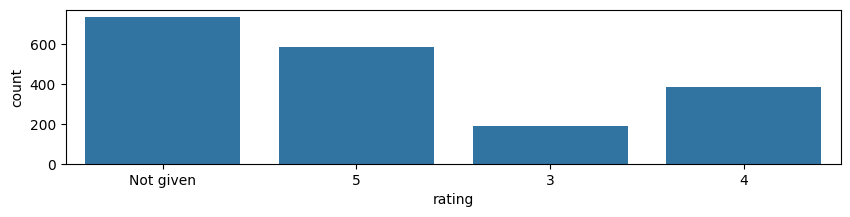

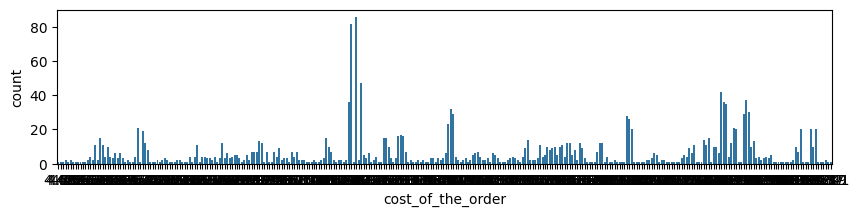

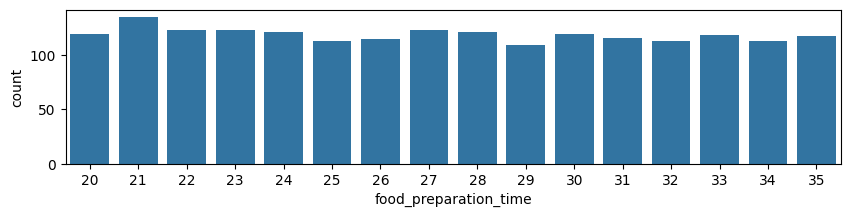

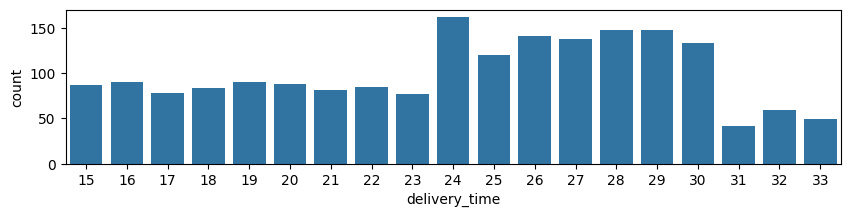

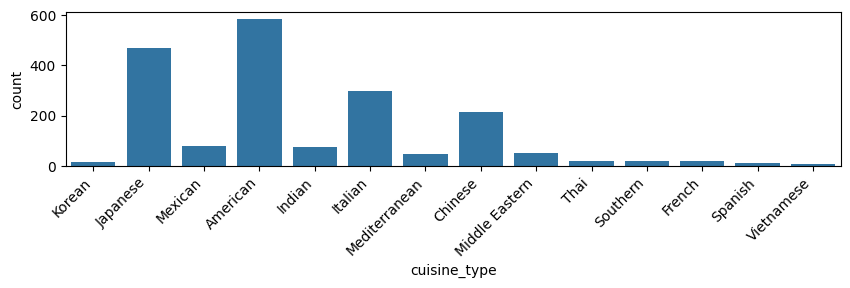

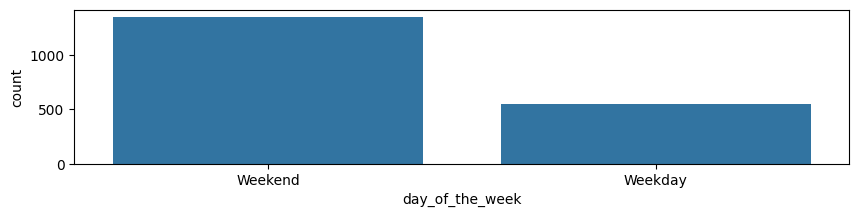

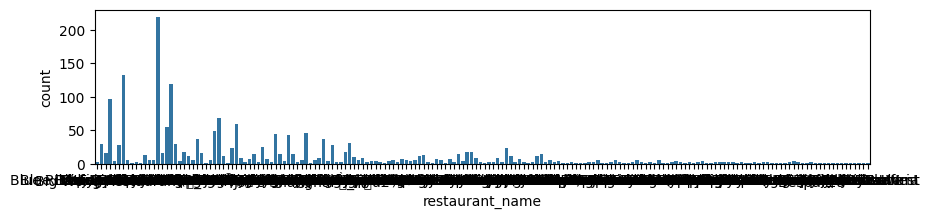

In [14]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(3,3))
sns.histplot(df['rating'])

plt.figure(figsize=(5,5))
sns.histplot(df['cost_of_the_order'])

plt.figure(figsize=(5,5))
sns.histplot(df['food_preparation_time'])

plt.figure(figsize=(5,5))
sns.histplot(df['delivery_time'])

plt.figure(figsize=(15,5))
sns.histplot(df['cuisine_type'])

plt.figure(figsize=(15,5))
sns.histplot(df['restaurant_name'])

plt.figure(figsize=(3,3))
sns.histplot(df['day_of_the_week'])

plt.figure(figsize=(6,2))
sns.boxplot(x= df['cost_of_the_order'],ax=plt.subplot(1,2,1))
sns.boxplot(x= df['rating'],ax=plt.subplot(1,2,2))

plt.figure(figsize=(6,2))
sns.boxplot(x= df['food_preparation_time'],ax=plt.subplot(1,2,1))
sns.boxplot(x= df['delivery_time'],ax=plt.subplot(1,2,2))

plt.figure(figsize=(11,2))
plt.xticks(rotation=45, ha='right')
sns.boxplot(x= df['cuisine_type'])

plt.figure(figsize=(4,2))
sns.boxplot(x= df['day_of_the_week'])

plt.figure(figsize=(4,2))
sns.boxplot(x= df['restaurant_name'])
# sns.boxplot(x= df['day_of_the_week'],ax=plt.subplot(1,2,3))

plt.figure(figsize=(10,2))
sns.countplot(x= df['rating'])

plt.figure(figsize=(10,2))
sns.countplot(x= df['cost_of_the_order'])

plt.figure(figsize=(10,2))
sns.countplot(x= df['food_preparation_time'])

plt.figure(figsize=(10,2))
sns.countplot(x= df['delivery_time'])

plt.figure(figsize=(10,2))
plt.xticks(rotation=45, ha='right')
sns.countplot(x= df['cuisine_type'])

plt.figure(figsize=(10,2))
sns.countplot(x= df['day_of_the_week'])

plt.figure(figsize=(10,2))
sns.countplot(x= df['restaurant_name'])


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here
df['restaurant_name'].value_counts(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts(ascending=False).head(1)


cuisine_type
American    415
Name: count, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [16]:
# Write the code here
above_twenty = df[df['cost_of_the_order'] > 20].value_counts().count()
total = df.value_counts().count()
percen = above_twenty/total*100
print(f'Total orders: {total}')
print(f'Orders above 20$: {above_twenty}')
print(f'% of above 20$ orders: {percen}')

Total orders: 1898
Orders above 20$: 555
% of above 20$ orders: 29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [17]:
# Write the code here
mean_del_time = round(df['delivery_time'].mean(), 2)
print(f"Mean delivery time: {mean_del_time} minutes")

Mean delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [18]:
# Write the code here
top_customers = df['customer_id'].value_counts(ascending=False).head(3)
top_customers_dic = top_customers.to_dict()

for id, count in top_customers_dic.items():
  print(f"Customer ID: {id}, Number of orders: {count}")

Customer ID: 52832, Number of orders: 13
Customer ID: 47440, Number of orders: 10
Customer ID: 83287, Number of orders: 9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [19]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

<ipython-input-30-5f3ae22d8ef6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)


<Axes: >

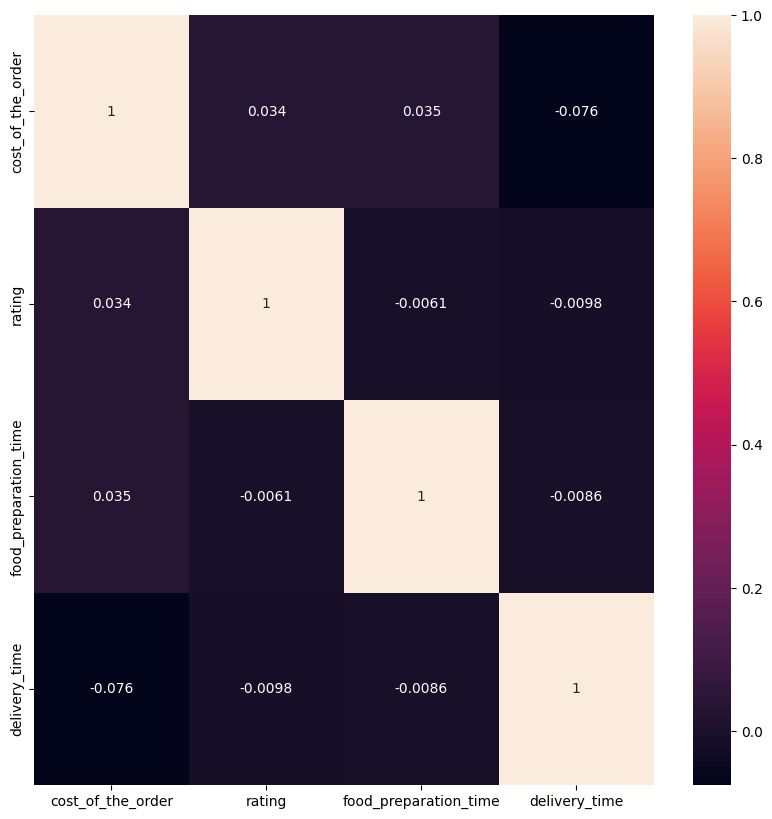

In [30]:
# Write the code here

# sns.pairplot(df)
plt.figure(figsize=(10,10))
l =['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
df = df[df['rating'] != 'Not given']
df['rating'] = df['rating'].astype(float)
sns.heatmap(df[l].corr(), annot=True)



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [101]:
# select restaurant_name, mean(rating) from tab
# group by restaurant_name
# having count(rating) > 50 and mean(rating) > 4

# PYF_Project_PresentationTemplate

# Remove the data which is 'Not given'
df = df[df['rating'] != 'Not given']
# df.head()
# df.info()

# Convert the rating column into float
df['rating'] = df['rating'].astype(float)
# df.info()

# Restaurants with rating count more than 50 and rating greater than 4
rest = df.groupby('restaurant_name').filter(lambda x: len(x) > 50 and x['rating'].mean() > 4)
rest.head(50)
print(f"The restaurants with rating count more than 50 and rating average greater than 4 are : \n \n{rest['restaurant_name'].unique()}")


The restaurants with rating count more than 50 and rating average greater than 4 are : 
 
['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [76]:
def calculate_net_revenue(df, lower_limit, lower_commission, higer_limit, higher_commission):
  df2 = df.copy()
  lower_commission = lower_commission * 0.001
  higher_commission = higher_commission * 0.001

  # Cost more than 20, add a new column with the commission with cost multiplied with 25%
  df2.loc[df['cost_of_the_order'] > 20, 'net_revenue'] = df2['cost_of_the_order'] * higher_commission

  # Cost between 5 and 20, add a new column with the commission with cost multiplied with 15%
  df2.loc[(df['cost_of_the_order']> lower_limit) & (df2['cost_of_the_order'] <= higer_limit), 'net_revenue'] = df2['cost_of_the_order'] * lower_commission

  net_revenue = df2['net_revenue'].sum()
  return net_revenue

print(f"Net revenue: {calculate_net_revenue(df, 5, 15, 20, 25)}")


Net revenue: 616.6303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [109]:
# Write the code here]
df[df['delivery_time'] > 60].count()
print("There are no orders which take more than 60 min")

There are no orders which take more than 60 min


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [129]:
# Write the code here
df.groupby(['restaurant_name','day_of_the_week'])['delivery_time'].mean().head(50)

restaurant_name                day_of_the_week
'wichcraft                     Weekday            28.000000
12 Chairs                      Weekday            29.000000
5 Napkin Burger                Weekend            21.000000
67 Burger                      Weekday            28.000000
Amma                           Weekday            25.500000
Amy Ruth's                     Weekday            29.000000
                               Weekend            26.000000
Anjappar Chettinad             Weekday            26.000000
Asuka Sushi                    Weekday            32.000000
                               Weekend            23.000000
Balade                         Weekday            24.000000
Balthazar Boulangerie          Weekday            28.000000
                               Weekend            25.750000
Barbounia                      Weekday            30.000000
                               Weekend            20.666667
Bareburger                     Weekday            26.

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  **Univariate analysis insights**

38% of (720 / 1898) orders are not given any rating

18% of the orders have the price between $10 to $15

There are no orders above $35 price

Lowest time taken in food preparation is 20 min

Heighest time taken in food prepareation less than 35 min

31% of the orders are delivered between 24 min to 31 min

Heighest number of orders are placed for American cuisine_type followed by Japanese, Italian and Chinese

Lowest number of orders recieved for Vietnamese cuisine type

72% of the orders are placed on weekend

50% of the orders are below $15

50% of the orders took delivery time less than 25 min



*  **Bivariate analysis insights**

cost_of_the_order and delivery_time are indirectly related

rating and delivery_time are indirectly related

food_preparation_time and delivery_time are indirectly related

rating and food_preparation_time are indirectly related

### Recommendations:

The weekday orders can be improved

Many orders are not rated, this needs to be avoided

Whenever the delivery time is incresed the ratings are coming down.

Delivery time can be reduced.

Food preperation time can be reduced to decrease the delivery time

In [31]:
!jupyter nbconvert --to html "/content/PYF_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1103202 bytes to /content/PYF_Project_LearnerNotebook_FullCode.html


---